# Session 7 - Neural Networks with TensorFlow

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2024-03-15 13:39:14.939953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

In [3]:
# convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [4]:
# define architecture 784x256x128x10
model = Sequential() # Sequential = goes through each layer one by one
model.add(Dense(256, #Add layer of 256 fully-connected nodes
                input_shape=(784,), 
                activation="relu"))
model.add(Dense(128, 
                activation="relu"))
model.add(Dense(10, 
                activation="softmax"))

/home/ucloud/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Show summary of model architecture

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [7]:
# train model using SGD
sgd = SGD(learning_rate = 0.01)
model.compile(loss="categorical_crossentropy", # Name of the loss function in use; there are many different 
              optimizer=sgd, 
              metrics=["accuracy"])

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [8]:
history = model.fit(X_train, y_train, 
                    validation_split=0.1, # Keep 10% of the training data for continously validating remaining 90% of data
                    epochs=10, # Going through entire dataset 10 times, adjusting values as it goes
                    batch_size=32) 

Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7244 - loss: 1.0484 - val_accuracy: 0.8993 - val_loss: 0.3514
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9125 - loss: 0.3096 - val_accuracy: 0.9168 - val_loss: 0.2857
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9269 - loss: 0.2554 - val_accuracy: 0.9282 - val_loss: 0.2423
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9374 - loss: 0.2187 - val_accuracy: 0.9386 - val_loss: 0.2162
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9465 - loss: 0.1884 - val_accuracy: 0.9421 - val_loss: 0.1957
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9525 - loss: 0.1651 - val_accuracy: 0.9452 - val_loss: 0.1838
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9591 - loss: 0.1424 - val_accuracy: 0.9529 - val_loss: 0.1634
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9624 - loss: 0.1364 

## Visualise using ```matplotlib```

Here we plot two things simultaneously - the accuracy on training and test data over time; and the loss curves over time.

Some terminology:

- If two loss curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two loss curves, then the model suffer from an overfitting problem (High Variance)


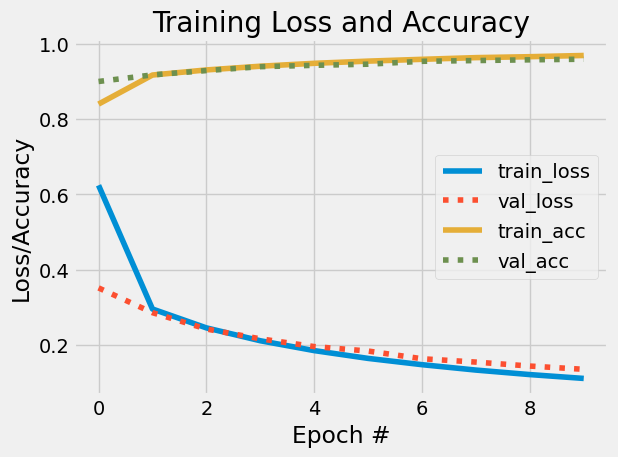

In [9]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

Can you explain what you think is happening in these cells?

In [10]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1345
           1       0.97      0.98      0.98      1561
           2       0.95      0.95      0.95      1401
           3       0.96      0.93      0.95      1450
           4       0.96      0.96      0.96      1387
           5       0.94      0.96      0.95      1238
           6       0.97      0.98      0.97      1358
           7       0.97      0.96      0.96      1487
           8       0.95      0.94      0.95      1388
           9       0.94      0.94      0.94      1385

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line.   
    - Use some of the things we've seen last week today - ```argparse```, ```venv```, etc.
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too